In [1]:
import os
import pandas as pd
import warnings
#import matplotlib.pyplot as plt
import sys
import numpy as np
#import seaborn as sns

from tqdm import tqdm
#from random import randint
#from sklearn.model_selection import train_test_split
import time
#import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from aggregation import load_and_preprocess_agg_window, Scaler_Metrics
sys.path.append("../")

from evaluate import plot_confusion_matrix, get_scores, plot_feature_importance

In [2]:
DEFAULT_LENGTH_Value = 60
STEP = 15

In [3]:


# key : value
# uniq_id : [60 values, label]

In [4]:
df_train = load_and_preprocess_agg_window("../Mesures/train", length_value = DEFAULT_LENGTH_Value, step = STEP)
df_test = load_and_preprocess_agg_window("../Mesures/test", length_value = DEFAULT_LENGTH_Value, step = STEP)


Load datasets...
Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 44.28it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 45.54it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 101.59it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 12.43it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.09it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.65it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.65it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|███████████████████████████████████████████████████████████████████████████████| 805/805 [00:01<00:00, 781.90it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.12it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 36.27it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.43it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.68it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 40.36it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 31.65it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.41it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.84it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|█████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:05<00:00, 330.42it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|███████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 699.98it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|███████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 641.58it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 122.51it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 62.44it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 76.59it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 99.70it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 255.25it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 445.51it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39
Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 286.51it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|███████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 763.14it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 683.00it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


  0%|                                                                                           | 0/94 [00:00<?, ?it/s]

Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 707.95it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 700.33it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 455.91it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 549.08it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 472.07it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 596.40it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 278.95it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 230.16it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


  0%|                                                                                         | 0/5593 [00:00<?, ?it/s]

Reformat...


100%|█████████████████████████████████████████████████████████████████████████████| 5593/5593 [00:52<00:00, 105.74it/s]


Load datasets...
Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 15.36it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:09<00:00,  2.82it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.71it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:01<00:00, 136.52it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 20.07it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|████████████████████████████████████████████████████████████████████████████████| 218/218 [00:02<00:00, 92.83it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


  0%|                                                                                          | 0/765 [00:00<?, ?it/s]

Reformat...


100%|████████████████████████████████████████████████████████████████████████████████| 765/765 [00:25<00:00, 30.31it/s]


In [5]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221117_125310_4_0,320.0,914.730159,1509.460317,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_15,849.363636,668.909091,488.454545,308.0,258.0,318.823529,374.048588,429.273647,484.498705,539.723764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_30,1876.837209,701.0,523.5,290.0,328.0,324.903226,459.450635,593.998045,728.545455,730.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_45,291.333333,275.666667,260.0,490.0,720.0,372.0,364.8,357.6,350.4,343.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_60,300.0,300.933333,301.866667,302.8,310.4,390.25,464.150568,538.051136,611.951705,685.852273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_161_150,427.333333,1000.563654,1573.793975,2147.024295,2720.254616,3293.484937,3866.715258,4439.945578,3762.0,3435.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_0,291.877966,264.320802,842.880535,1421.440267,2000.0,1693.485714,1386.971429,1080.457143,773.942857,467.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_15,1294.42957,1271.768232,1249.106893,1226.445554,1203.784216,1181.122877,1158.461538,734.688525,685.501944,636.315363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_30,341.195876,2458.325333,2424.260267,2390.1952,2356.130133,2322.065067,2288.0,1816.727273,1345.454545,874.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube


In [6]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)
training_data

20221124_151137_4_0       messenger
20221124_151137_4_15      messenger
20221124_151137_4_30      messenger
20221124_151137_4_45      messenger
20221124_151137_4_60      messenger
                            ...    
20230117_121925_262_45      youtube
20230117_121925_263_0       youtube
20230117_121925_263_15      youtube
20230117_121925_263_30      youtube
20230117_121925_263_45      youtube
Name: label, Length: 10078, dtype: object


,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4_0,-1.710771,-1.322731,-0.900294,-1.089258,-0.882544,-1.019323,-1.766478,-1.672280,-1.612701,-1.548966,...,-0.034104,-0.033999,-0.033402,-0.03427,-0.033885,-0.032043,-0.03529,-0.034987,-0.035087,messenger
20221117_125310_4_15,-1.336968,-1.499654,-1.633905,-1.763269,-1.824246,-1.716159,-1.685009,-1.620764,-1.589686,-1.554624,...,-0.034104,-0.033999,-0.033402,-0.03427,-0.033885,-0.032043,-0.03529,-0.034987,-0.035087,messenger
20221117_125310_4_30,-0.611432,-1.476557,-1.608724,-1.776215,-1.773084,-1.711880,-1.624708,-1.506420,-1.419712,-1.421638,...,-0.034104,-0.033999,-0.033402,-0.03427,-0.033885,-0.032043,-0.03529,-0.034987,-0.035087,messenger
20221117_125310_4_45,-1.731013,-1.782678,-1.798054,-1.632375,-1.486576,-1.678736,-1.691539,-1.670517,-1.683084,-1.691498,...,-0.034104,-0.033999,-0.033402,-0.03427,-0.033885,-0.032043,-0.03529,-0.034987,-0.035087,messenger
20221117_125310_4_60,-1.724893,-1.764493,-1.767972,-1.767009,-1.785948,-1.665892,-1.621390,-1.545256,-1.500917,-1.452850,...,-0.034104,-0.033999,-0.033402,-0.03427,-0.033885,-0.032043,-0.03529,-0.034987,-0.035087,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_161_150,-1.634979,-1.260955,-0.854069,-0.440644,-0.024613,0.377281,0.781103,1.163259,0.693039,0.461937,...,-0.034104,-0.033999,-0.033402,-0.03427,-0.033885,-0.032043,-0.03529,-0.034987,-0.035087,youtube
20230124_124323_166_0,-1.730629,-1.790844,-1.379243,-0.962484,-0.551039,-0.748730,-0.969802,-1.168743,-1.388093,-1.604976,...,-0.034104,-0.033999,-0.033402,-0.03427,-0.033885,-0.032043,-0.03529,-0.034987,-0.035087,youtube
20230124_124323_166_15,-1.022691,-1.065764,-1.087363,-1.102724,-1.132984,-1.109310,-1.131148,-1.408759,-1.449691,-1.487351,...,-0.034104,-0.033999,-0.033402,-0.03427,-0.033885,-0.032043,-0.03529,-0.034987,-0.035087,youtube


In [7]:
training_data = training_data[training_data .label!="noise"]
testing_data = testing_data[testing_data .label!="noise"]

In [8]:
# Train + Evaluate

In [9]:
time_counter = time.time_ns()

model = RandomForestClassifier(class_weight = "balanced")
model.fit(training_data[training_data.columns[:-1]], training_data.label)

training_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Training Duration : {training_duration} s for a dataset length of {len(training_data.label)}")

Training Duration : 23.0899298 s for a dataset length of 23565


In [10]:
# mesure efficiency
time_counter = time.time_ns()

preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

testing_duration = (time.time_ns() - time_counter)/(10**9)
print(f"Testing Duration : {testing_duration} s for a dataset length of {len(testing_data.label)}")
testing_duration_per_item = testing_duration*(10**3)/len(testing_data.label)
print(f"Testing Duration per data : {testing_duration_per_item} ms")

Testing Duration : 0.2588815 s for a dataset length of 10068
Testing Duration per data : 0.02571329956297179 ms


normalized confusion matrix


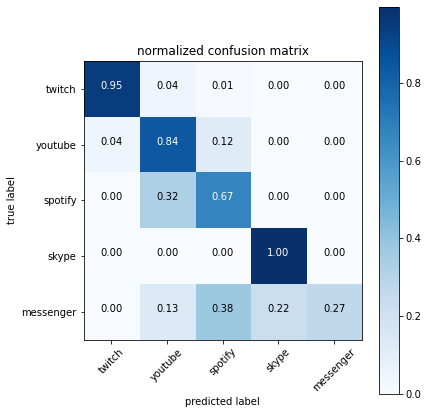

In [11]:
plot_confusion_matrix(true_labels,preds_labels)

In [12]:
get_scores(true_labels,preds_labels)

{'Accuracy': 0.7454713322067378,
 'Precision': 0.8468723410869977,
 'Recall': 0.4640444974175606,
 'F1_Score': 0.4817432729557786,
 'support': None}

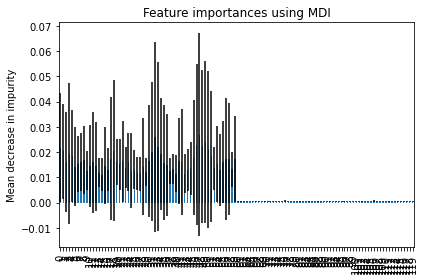

In [13]:
plot_feature_importance(model, training_data.columns[:-1])